References:

- https://github.com/chuachinhon/practical_nlp/blob/master/notebooks/1.0_speech_sentiment_cch.ipynb
- https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader

import pandas as pd
import numpy as np

import re

import os
import matplotlib.pyplot as plt

In [3]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [4]:
# Define the file directory
file_directory = '..\\Dataset\\'

#Scan directory for entire corpus
entries = os.scandir(file_directory)

#Store file ids in a list
fids = []
for entry in entries:
    fids.append(entry.name)
        
print(fids)

['2004_chi.txt', '2004_eng.txt', '2004_mal.txt', '2005_chi.txt', '2005_eng.txt', '2005_mal.txt', '2006_chi.txt', '2006_eng.txt', '2006_mal.txt', '2007_chi.txt', '2007_eng.txt', '2007_mal.txt', '2008_chi.txt', '2008_eng.txt', '2008_mal.txt', '2009_chi.txt', '2009_eng.txt', '2009_mal.txt', '2010_chi.txt', '2010_eng.txt', '2010_mal.txt', '2011_chi.txt', '2011_eng.txt', '2011_mal.txt', '2012_chi.txt', '2012_eng.txt', '2012_mal.txt', '2013_chi.txt', '2013_eng.txt', '2013_mal.txt', '2014_chi.txt', '2014_eng.txt', '2014_mal.txt', '2015_chi.txt', '2015_eng.txt', '2015_mal.txt', '2016_chi.txt', '2016_eng.txt', '2016_mal.txt', '2017_chi.txt', '2017_eng.txt', '2017_mal.txt', '2018_chi.txt', '2018_eng.txt', '2018_mal.txt', '2019_chi.txt', '2019_eng.txt', '2019_mal.txt', '2021_chi.txt', '2021_eng.txt', '2021_mal.txt', '2022_chi.txt', '2022_eng.txt', '2022_mal.txt']


In [5]:
#Create an empty dataframe
df  = pd.DataFrame([['start','start']],columns=['Paragraphs','Year'])

#Loop through all files and store the text into the defined dataframe
for i in range(len(fids)): 
    with open(file_directory + fids[i], 'r', encoding="utf8") as file_to_read:
        temp_df = file_to_read.read()
        temp_df = (pd.DataFrame(temp_df.split("\n\n"))).rename(columns={0: "Paragraphs"})
        temp_df['Year'] = fids[i] 
    df = pd.concat([df,temp_df])

#Create new column to store Paragraph Numbers 
df['ParasNo'] = df.index

In [6]:
#Reset Index and drop dummy row
df.reset_index(inplace=True, drop=True)
df.drop(index=0, inplace=True)
df.reset_index(inplace=True, drop=True)

#Rearranging columns
df = df[['Year','ParasNo','Paragraphs']] 
df

,Year,ParasNo,Paragraphs
0,2004_chi.txt,0,INTRODUCTION
1,2004_chi.txt,1,"\nNext year, Singapore will turn 40.� Over th..."
2,2004_chi.txt,2,RESTRUCTURING AND FINDING JOBS
3,2004_chi.txt,3,\nMany grassroots leaders have told me that o...
4,2004_chi.txt,4,COST OF LIVING� AND MEDICAL EXPENSES
...,...,...,...
2976,2022_mal.txt,41,A strong and resilient Malay/Muslim community ...
2977,2022_mal.txt,42,"I am glad that over the decades, the Malay/Mus..."
2978,2022_mal.txt,43,The Government supports the Malay/Muslim commu...
2979,2022_mal.txt,44,"My fellow Singaporeans, let us further strengt..."


In [7]:
df.set_index('Year')

,ParasNo,Paragraphs
Year,,
2004_chi.txt,0,INTRODUCTION
2004_chi.txt,1,"\nNext year, Singapore will turn 40.� Over th..."
2004_chi.txt,2,RESTRUCTURING AND FINDING JOBS
2004_chi.txt,3,\nMany grassroots leaders have told me that o...
2004_chi.txt,4,COST OF LIVING� AND MEDICAL EXPENSES
...,...,...
2022_mal.txt,41,A strong and resilient Malay/Muslim community ...
2022_mal.txt,42,"I am glad that over the decades, the Malay/Mus..."
2022_mal.txt,43,The Government supports the Malay/Muslim commu...


In [8]:
# Pre-processing
#Drop rows with empty strings 
df.drop(index=df[df['Paragraphs'] == ''].index, inplace=True)
df.reset_index(inplace=True, drop=True)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n", " ", text) #replace "\n" with " "
    text = re.sub(r"\W", " ", text) #replaces non-word characters like ',' with " "
    text = re.sub(r"^\d+\s|\s\d+\s|\s\d+$", " ", text) #removes digits e.g. 16 years >> years
    text = text.strip(" ")
    text = re.sub(r"[^\w\s]", "", text)
    return text

df["Clean_Text"] = df['Paragraphs'].map(lambda text: clean_text(text))

In [9]:
df

,Year,ParasNo,Paragraphs,Clean_Text
0,2004_chi.txt,0,INTRODUCTION,introduction
1,2004_chi.txt,1,"\nNext year, Singapore will turn 40.� Over th...",next year singapore will turn over the year...
2,2004_chi.txt,2,RESTRUCTURING AND FINDING JOBS,restructuring and finding jobs
3,2004_chi.txt,3,\nMany grassroots leaders have told me that o...,many grassroots leaders have told me that our ...
4,2004_chi.txt,4,COST OF LIVING� AND MEDICAL EXPENSES,cost of living and medical expenses
...,...,...,...,...
2968,2022_mal.txt,41,A strong and resilient Malay/Muslim community ...,a strong and resilient malay muslim community ...
2969,2022_mal.txt,42,"I am glad that over the decades, the Malay/Mus...",i am glad that over the decades the malay mus...
2970,2022_mal.txt,43,The Government supports the Malay/Muslim commu...,the government supports the malay muslim commu...
2971,2022_mal.txt,44,"My fellow Singaporeans, let us further strengt...",my fellow singaporeans let us further strengt...


In [12]:
#Use SentimentIntensityAnalyzer to label paragraphs
df['scores'] = df['Clean_Text'].apply(lambda x: sid.polarity_scores(x))

#Separate out the compound score
df['Sentiment Score']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
#Assign polarity (pos, neg based on compound score)
df['Sentiment'] = df['Sentiment Score'].apply(lambda c: 'Positive' if c >0 else 'Negative' if c<0 else 'Neutral') #(lambda c: 'POSITIVE' if c >=0 else 'NEGATIVE')

df

,Year,ParasNo,Paragraphs,Clean_Text,scores,Sentiment Score,Sentiment Label,Sentiment
0,2004_chi.txt,0,INTRODUCTION,introduction,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
1,2004_chi.txt,1,"\nNext year, Singapore will turn 40.� Over th...",next year singapore will turn over the year...,"{'neg': 0.051, 'neu': 0.79, 'pos': 0.158, 'com...",0.9834,Positive,Positive
2,2004_chi.txt,2,RESTRUCTURING AND FINDING JOBS,restructuring and finding jobs,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
3,2004_chi.txt,3,\nMany grassroots leaders have told me that o...,many grassroots leaders have told me that our ...,"{'neg': 0.083, 'neu': 0.72, 'pos': 0.198, 'com...",0.9935,Positive,Positive
4,2004_chi.txt,4,COST OF LIVING� AND MEDICAL EXPENSES,cost of living and medical expenses,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
...,...,...,...,...,...,...,...,...
2968,2022_mal.txt,41,A strong and resilient Malay/Muslim community ...,a strong and resilient malay muslim community ...,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou...",0.7096,Positive,Positive
2969,2022_mal.txt,42,"I am glad that over the decades, the Malay/Mus...",i am glad that over the decades the malay mus...,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.8442,Positive,Positive
2970,2022_mal.txt,43,The Government supports the Malay/Muslim commu...,the government supports the malay muslim commu...,"{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'comp...",0.3612,Positive,Positive
2971,2022_mal.txt,44,"My fellow Singaporeans, let us further strengt...",my fellow singaporeans let us further strengt...,"{'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'comp...",0.9545,Positive,Positive


In [23]:
#Export All Paras Sentiment Scores
df[["Year","ParasNo","Paragraphs","Clean_Text","scores","Sentiment Score","Sentiment"]]
df.to_csv('sentiment_score_paras.csv', index = False)

#Export Overall Sentiment Score
df_results = df.groupby(by='Year').mean("Sentiment Score")
df_results.drop(columns="ParasNo", inplace = True)
df_results['Sentiment'] = df_results['Sentiment Score'].apply(lambda c: 'Positive' if c >0 else 'Negative' if c<0 else 'Neutral')
df_results.to_csv('sentiment_score_overall.csv')

#### Visualisations

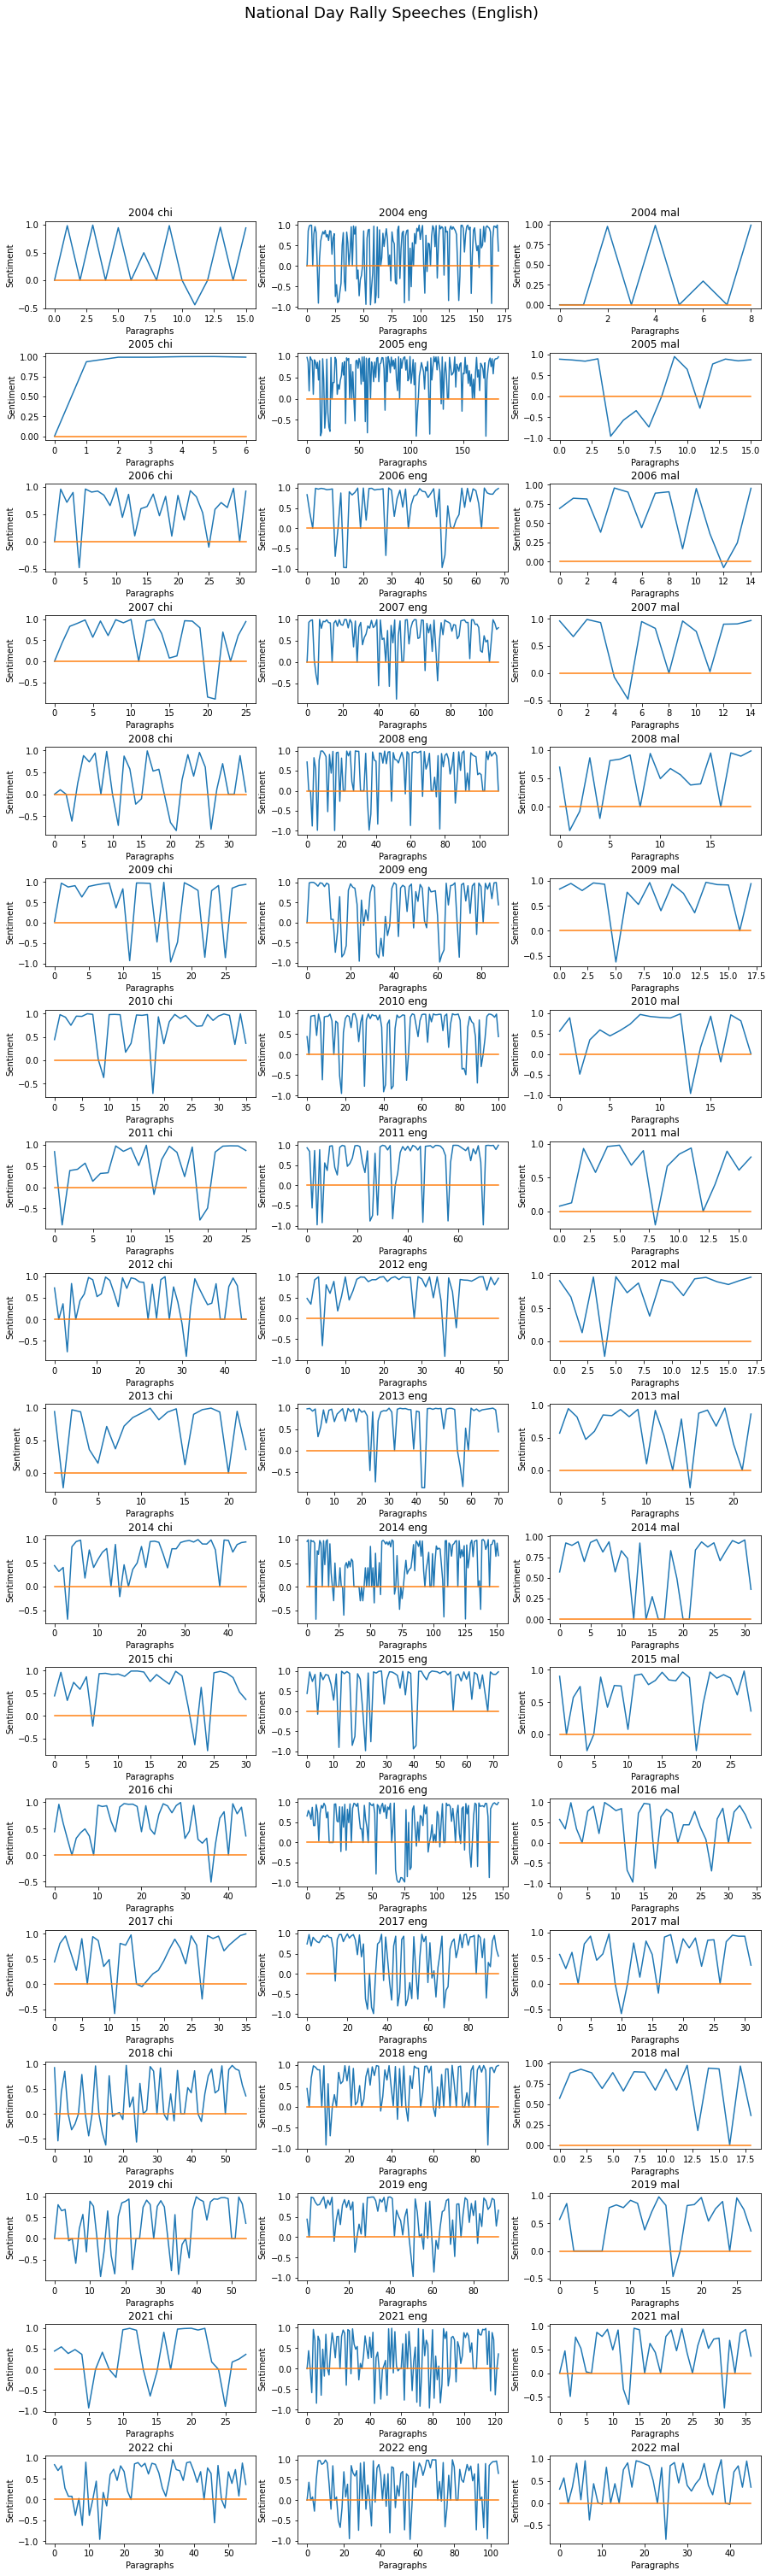

In [15]:
plt.figure(figsize=(15, 50))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("National Day Rally Speeches (English)", fontsize=18, y=0.95)

years = [year[0:4] for year in fids]

# loop through the length of tickers and keep track of index
j = 0
for n, year in enumerate(fids):
    # add a new subplot iteratively
    ax = plt.subplot(18, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    ax.plot(df[df['Year'] == year].ParasNo,df[df['Year'] == year]["VADER_Score"])
    #df[df['Year'] == year].ParasNo,df[df['Year'] == year]["VADER_Score"].plot(ax=ax)
    plt.plot(np.arange(0,len(df[df['Year'] == year])), np.zeros(len(df[df['Year'] == year]))) # add a neutral line

    # chart formatting
    ax.set_title(year[0:4] + " " + year[5:8])
    ax.set_ylabel('Sentiment')
    ax.set_xlabel("Paragraphs")
    


Other type of chart, but must edit the code such that the red and blue is for negative and positive respectively. Now is automatic such that if the whole speech is positive then there is an issue with the heat map range.

In [50]:
"""
from __future__ import print_function

import ipywidgets as widgets
import matplotlib as mpl
import plotly
import plotly_express as px
import plotly.graph_objects as go

mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

for i in fids:
    fig = go.Figure(
        data=go.Heatmap(
            z=df[df['Year'] == i]["VADER_Score"],
            x=df.ParasNo,
            y=df[df['Year'] == i]["VADER_Label"],
            colorscale=px.colors.sequential.RdBu,
        )
    )

    fig.update_layout(
        title=go.layout.Title(
            text= "Sentiment Analysis of NDR " + i[0:4] + " " + i[5:8]
        ),
        autosize=False,
        width=900,
        height=300,
    )

    fig.update_layout(yaxis_autorange = "reversed")

    fig.show()

"""

'\nfor i in fids:\n    fig = go.Figure(\n        data=go.Heatmap(\n            z=df[df[\'Year\'] == i]["VADER_Score"],\n            x=df.ParasNo,\n            y=df[df[\'Year\'] == i]["VADER_Label"],\n            colorscale=px.colors.sequential.RdBu,\n        )\n    )\n\n    fig.update_layout(\n        title=go.layout.Title(\n            text= "Sentiment Analysis of NDR " + i[0:4] + " " + i[5:8]\n        ),\n        autosize=False,\n        width=900,\n        height=300,\n    )\n\n    fig.update_layout(yaxis_autorange = "reversed")\n\n    fig.show()\n\n'